## Test on sagittal MERFISH dataset   
Download and derive the dataset for our analyis.

In [1]:
import pandas as pd
import numpy as np
import json
import os
import matplotlib.pyplot as plt

In [2]:
version = '20231215'
download_base = '/data/abc_atlas'
manifest_path = 'releases/%s/manifest.json' % version
file = os.path.join(download_base, manifest_path)
with open(file,'rb') as f:
    manifest = json.load(f)
    
    
datasets = ['Zhuang-ABCA-3','Zhuang-ABCA-4']
example_section = {'Zhuang-ABCA-3':'Zhuang-ABCA-3.022',
                   'Zhuang-ABCA-4':'Zhuang-ABCA-4.001'}
metadata = {}
for d in datasets :
    metadata[d] = manifest['file_listing'][d]['metadata']

#### Build the complete dataset

In [3]:
cell = {}
for d in datasets :   
    rpath = metadata[d]['cell_metadata']['files']['csv']['relative_path']
    file = os.path.join(download_base, rpath)
    cell[d] = pd.read_csv(file, dtype={"cell_label":str})
    cell[d].set_index('cell_label',inplace=True)
    sdf = cell[d].groupby('brain_section_label')
    
    print(d,":","Number of cells = ", len(cell[d]), ", ", "Number of sections =", len(sdf))

Zhuang-ABCA-3 : Number of cells =  1585843 ,  Number of sections = 23
Zhuang-ABCA-4 : Number of cells =  162578 ,  Number of sections = 3


In [9]:
cell['Zhuang-ABCA-3']['brain_section_label'].unique()

array(['Zhuang-ABCA-3.023', 'Zhuang-ABCA-3.024', 'Zhuang-ABCA-3.025',
       'Zhuang-ABCA-3.017', 'Zhuang-ABCA-3.016', 'Zhuang-ABCA-3.010',
       'Zhuang-ABCA-3.008', 'Zhuang-ABCA-3.003', 'Zhuang-ABCA-3.004',
       'Zhuang-ABCA-3.001', 'Zhuang-ABCA-3.015', 'Zhuang-ABCA-3.002',
       'Zhuang-ABCA-3.022', 'Zhuang-ABCA-3.011', 'Zhuang-ABCA-3.019',
       'Zhuang-ABCA-3.005', 'Zhuang-ABCA-3.006', 'Zhuang-ABCA-3.012',
       'Zhuang-ABCA-3.021', 'Zhuang-ABCA-3.007', 'Zhuang-ABCA-3.013',
       'Zhuang-ABCA-3.020', 'Zhuang-ABCA-3.009'], dtype=object)

In [10]:
len(cell['Zhuang-ABCA-3']['brain_section_label'].unique())

23

We can see that section 25 is missing in the complete dataset because it is not CCF-registered.

In [12]:
cell['Zhuang-ABCA-3'].head(3)

,brain_section_label,feature_matrix_label,donor_label,donor_genotype,donor_sex,cluster_alias,x,y,z,subclass_confidence_score,cluster_confidence_score,high_quality_transfer
cell_label,,,,,,,,,,,,
198904341065180396762707397604803217407,Zhuang-ABCA-3.023,Zhuang-ABCA-3,Zhuang-ABCA-3,wt/wt,M,5252,5.128755,4.752046,1.230645,0.986932,0.982286,True
252199681526991424029643077826220097990,Zhuang-ABCA-3.023,Zhuang-ABCA-3,Zhuang-ABCA-3,wt/wt,M,5252,5.112333,4.745410,1.230645,0.928555,0.842943,True
277720971126854564514249564750701518375,Zhuang-ABCA-3.023,Zhuang-ABCA-3,Zhuang-ABCA-3,wt/wt,M,5261,5.101224,4.722090,1.230645,0.921832,0.603301,True


Read in the pivot table from the **cluster annotation** to associate each cell with terms at each cell type classification level and the corresponding color.

In [14]:
taxonomy_metadata = manifest['file_listing']['WMB-taxonomy']['metadata']

rpath = taxonomy_metadata['cluster_to_cluster_annotation_membership_pivoted']['files']['csv']['relative_path']
file = os.path.join( download_base, rpath)
cluster_details = pd.read_csv(file,keep_default_na=False)
cluster_details.set_index('cluster_alias', inplace=True)
cell_extended = {}

for d in datasets :
    cell_extended[d] = cell[d].join(cluster_details,on='cluster_alias')
cell_extended[datasets[0]].head(4)

,brain_section_label,feature_matrix_label,donor_label,donor_genotype,donor_sex,cluster_alias,x,y,z,subclass_confidence_score,cluster_confidence_score,high_quality_transfer,neurotransmitter,class,subclass,supertype,cluster
cell_label,,,,,,,,,,,,,,,,,
198904341065180396762707397604803217407,Zhuang-ABCA-3.023,Zhuang-ABCA-3,Zhuang-ABCA-3,wt/wt,M,5252,5.128755,4.752046,1.230645,0.986932,0.982286,True,,33 Vascular,333 Endo NN,1193 Endo NN_1,5309 Endo NN_1
252199681526991424029643077826220097990,Zhuang-ABCA-3.023,Zhuang-ABCA-3,Zhuang-ABCA-3,wt/wt,M,5252,5.112333,4.745410,1.230645,0.928555,0.842943,True,,33 Vascular,333 Endo NN,1193 Endo NN_1,5309 Endo NN_1
277720971126854564514249564750701518375,Zhuang-ABCA-3.023,Zhuang-ABCA-3,Zhuang-ABCA-3,wt/wt,M,5261,5.101224,4.722090,1.230645,0.921832,0.603301,True,,33 Vascular,330 VLMC NN,1188 VLMC NN_2,5301 VLMC NN_2
31551867344111790264292067056219852271,Zhuang-ABCA-3.023,Zhuang-ABCA-3,Zhuang-ABCA-3,wt/wt,M,5258,5.105775,4.707346,1.230645,0.905368,0.905368,True,,33 Vascular,329 ABC NN,1186 ABC NN_1,5295 ABC NN_1


#### Add parcellation substructures

Join with CCF coordinates for **parcellation index**.

In [15]:
ccf_coordinates = {}
for d in datasets :   
    rpath = manifest['file_listing'][d+'-CCF']['metadata']['ccf_coordinates']['files']['csv']['relative_path']
    file = os.path.join(download_base, rpath)
    ccf_coordinates[d] = pd.read_csv(file)
    ccf_coordinates[d].set_index('cell_label',inplace=True)  ## only registered cells
    ccf_coordinates[d].rename(columns={'x':'x_ccf','y':'y_ccf','z':'z_ccf'},inplace=True)    
    cell_extended[d] = cell_extended[d].join(ccf_coordinates[d],how='inner')

In [16]:
metadata = manifest['file_listing']['Allen-CCF-2020']['metadata']
rpath = metadata['parcellation_to_parcellation_term_membership_acronym']['files']['csv']['relative_path']
file = os.path.join( download_base, rpath)
parcellation_annotation = pd.read_csv(file)
parcellation_annotation.set_index('parcellation_index',inplace=True)
parcellation_annotation.columns = ['parcellation_%s'% x for x in  parcellation_annotation.columns]
rpath = metadata['parcellation_to_parcellation_term_membership_color']['files']['csv']['relative_path']
file = os.path.join( download_base, rpath)
parcellation_color = pd.read_csv(file)
parcellation_color.set_index('parcellation_index',inplace=True)
parcellation_color.columns = ['parcellation_%s'% x for x in  parcellation_color.columns]
for d in datasets :
    cell_extended[d] = cell_extended[d].join(parcellation_annotation,on='parcellation_index')
    cell_extended[d] = cell_extended[d].join(parcellation_color,on='parcellation_index')   

In [17]:
cell_extended[datasets[0]].head(3)

,brain_section_label,feature_matrix_label,donor_label,donor_genotype,donor_sex,cluster_alias,x,y,z,subclass_confidence_score,...,parcellation_organ,parcellation_category,parcellation_division,parcellation_structure,parcellation_substructure,parcellation_organ_color,parcellation_category_color,parcellation_division_color,parcellation_structure_color,parcellation_substructure_color
cell_label,,,,,,,,,,,,,,,,,,,,,
198904341065180396762707397604803217407,Zhuang-ABCA-3.023,Zhuang-ABCA-3,Zhuang-ABCA-3,wt/wt,M,5252,5.128755,4.752046,1.230645,0.986932,...,brain,grey,Isocortex,VISC,VISC1,#FFFFFF,#BFDAE3,#70FF71,#11AD83,#11AD83
252199681526991424029643077826220097990,Zhuang-ABCA-3.023,Zhuang-ABCA-3,Zhuang-ABCA-3,wt/wt,M,5252,5.112333,4.745410,1.230645,0.928555,...,unassigned,unassigned,unassigned,unassigned,unassigned,#000000,#000000,#000000,#000000,#000000
277720971126854564514249564750701518375,Zhuang-ABCA-3.023,Zhuang-ABCA-3,Zhuang-ABCA-3,wt/wt,M,5261,5.101224,4.722090,1.230645,0.921832,...,unassigned,unassigned,unassigned,unassigned,unassigned,#000000,#000000,#000000,#000000,#000000


In [18]:
cell_extended[datasets[0]].columns

Index(['brain_section_label', 'feature_matrix_label', 'donor_label',
       'donor_genotype', 'donor_sex', 'cluster_alias', 'x', 'y', 'z',
       'subclass_confidence_score', 'cluster_confidence_score',
       'high_quality_transfer', 'neurotransmitter', 'class', 'subclass',
       'supertype', 'cluster', 'x_ccf', 'y_ccf', 'z_ccf', 'parcellation_index',
       'parcellation_organ', 'parcellation_category', 'parcellation_division',
       'parcellation_structure', 'parcellation_substructure',
       'parcellation_organ_color', 'parcellation_category_color',
       'parcellation_division_color', 'parcellation_structure_color',
       'parcellation_substructure_color'],
      dtype='object')

#### Plot example section for view

In [7]:
%matplotlib inline

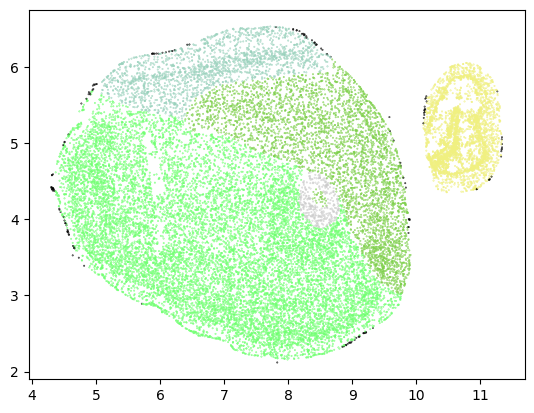

In [19]:
d = datasets[0]
pred = (cell_extended[d]['brain_section_label'] == example_section[d])
section = cell_extended[d][pred] 
plt.scatter(section['x'], section['y'],s=0.5,color=section['parcellation_division_color'],marker='.')

In [30]:
cell_extended[datasets[0]].head(4)

,brain_section_label,feature_matrix_label,donor_label,donor_genotype,donor_sex,cluster_alias,x,y,z,subclass_confidence_score,...,parcellation_organ,parcellation_category,parcellation_division,parcellation_structure,parcellation_substructure,parcellation_organ_color,parcellation_category_color,parcellation_division_color,parcellation_structure_color,parcellation_substructure_color
cell_label,,,,,,,,,,,,,,,,,,,,,
198904341065180396762707397604803217407,Zhuang-ABCA-3.023,Zhuang-ABCA-3,Zhuang-ABCA-3,wt/wt,M,5252,5.128755,4.752046,1.230645,0.986932,...,brain,grey,Isocortex,VISC,VISC1,#FFFFFF,#BFDAE3,#70FF71,#11AD83,#11AD83
252199681526991424029643077826220097990,Zhuang-ABCA-3.023,Zhuang-ABCA-3,Zhuang-ABCA-3,wt/wt,M,5252,5.112333,4.745410,1.230645,0.928555,...,unassigned,unassigned,unassigned,unassigned,unassigned,#000000,#000000,#000000,#000000,#000000
277720971126854564514249564750701518375,Zhuang-ABCA-3.023,Zhuang-ABCA-3,Zhuang-ABCA-3,wt/wt,M,5261,5.101224,4.722090,1.230645,0.921832,...,unassigned,unassigned,unassigned,unassigned,unassigned,#000000,#000000,#000000,#000000,#000000
31551867344111790264292067056219852271,Zhuang-ABCA-3.023,Zhuang-ABCA-3,Zhuang-ABCA-3,wt/wt,M,5258,5.105775,4.707346,1.230645,0.905368,...,unassigned,unassigned,unassigned,unassigned,unassigned,#000000,#000000,#000000,#000000,#000000


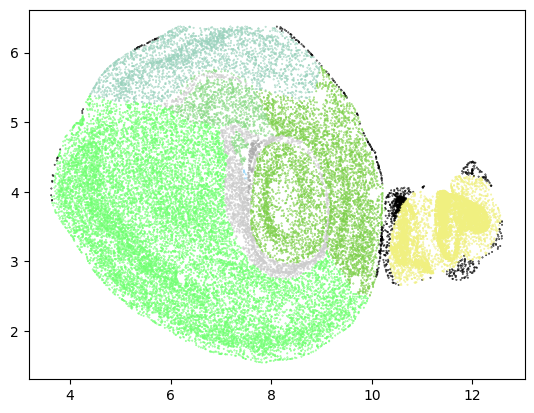

In [20]:
d = datasets[1]
pred = (cell_extended[d]['brain_section_label'] == example_section[d])
section = cell_extended[d][pred] 
plt.scatter(section['x'], section['y'],s=0.5,color=section['parcellation_division_color'],marker='.')

In [8]:
len(cell_extended[datasets[0]]['brain_section_label'].unique())

22

In [22]:
cell_extended[datasets[0]].to_csv('/data/cell_zhuang_1.csv')
# cell_joined = pd.read_csv('/data/cell_zhuang_1.csv',dtype={"cell_label":str})
region = cell_joined[cell_joined['parcellation_division'] == 'Isocortex']
sections = ['Zhuang-ABCA-3.024', 'Zhuang-ABCA-3.023','Zhuang-ABCA-3.022', 'Zhuang-ABCA-3.021', 'Zhuang-ABCA-3.020','Zhuang-ABCA-3.019','Zhuang-ABCA-3.018','Zhuang-ABCA-3.017','Zhuang-ABCA-3.016','Zhuang-ABCA-3.015']
filtered = region[region['brain_section_label'].isin(sections)]
filtered.to_csv('/data/sag_data.csv')

We will use the derived dataset **sag_data** for following analysis.